<h1> Bathymetry data </h1>

Data downloaded from https://download.gebco.net/

The file can be found on in the `data_raw` folder in our Shared Drive.

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

/Users/maureenfonseca/opt/anaconda3/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Get the bathymetry data. The data is stored in [GEBCO_21_Jun_2022_33f5e5f23185](https://drive.google.com/drive/folders/1ttZKiyWJtAEASUhNS-XC-UmpiEVbUz_5?usp=sharing).

In [2]:
fname = "GEBCO_21_Jun_2022_33f5e5f23185/gebco_2021_n8.0_s1.0_w-90.0_e-85.0.nc"

Inspect the netCDF4 file.

In [3]:
fh = Dataset(fname, 'r')

In [4]:
fh

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: The GEBCO_2021 Grid - a continuous terrain model for oceans and land at 15 arc-second intervals
    summary: The GEBCO_2021 Grid is a continuous, global terrain model for ocean and land with a spatial resolution of 15 arc seconds.The grid uses as a 'base-map' Version 2.2 of the SRTM15+ data set (Tozer et al, 2019). This data set is a fusion of land topography with measured and estimated seafloor topography. It is augmented with gridded bathymetric data sets developed as part of the Nippon Foundation-GEBCO Seabed 2030 Project.
    keywords: BATHYMETRY/SEAFLOOR TOPOGRAPHY, DIGITAL ELEVATION/DIGITAL TERRAIN MODELS
    Conventions: CF-1.6, ACDD-1.3
    id: DOI: 10.5285/c6612cbe-50b3-0cff-e053-6c86abc09f8f
    naming_authority: https://dx.doi.org
    history: Information on the development of the data set and the source data sets included in the grid can be found in the data set docum

Look into specific variables.

In [5]:
fh.variables["elevation"]

<class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_mean_sea_level
    long_name: Elevation relative to sea level
    units: m
    grid_mapping: crs
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Sea floor height (above mean sea level) {bathymetric height}
    sdn_uom_urn: SDN:P06::ULAA
    sdn_uom_name: Metres
unlimited dimensions: 
current shape = (1680, 1200)
filling on, default _FillValue of -32767 used

In [6]:
fh.variables["lon"]

<class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (1200,)
filling on, default _FillValue of 9.969209968386869e+36 used

Import the specific variables.

In [7]:
z = fh.variables["elevation"][:].data
lon = fh.variables["lon"][:].data
lat = fh.variables["lat"][:].data

Grid longitude and latitude for `pcolor` plot.

In [8]:
Lon, Lat = np.meshgrid(lon, lat)

<h3> Plots </h3>

First import the countries info from geopandas.

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

Import the AMMB boundary file.

In [10]:
AMMB = gpd.read_file("AMMB_IUCN_data/geospatial_input/AMMB_boundary.shp")

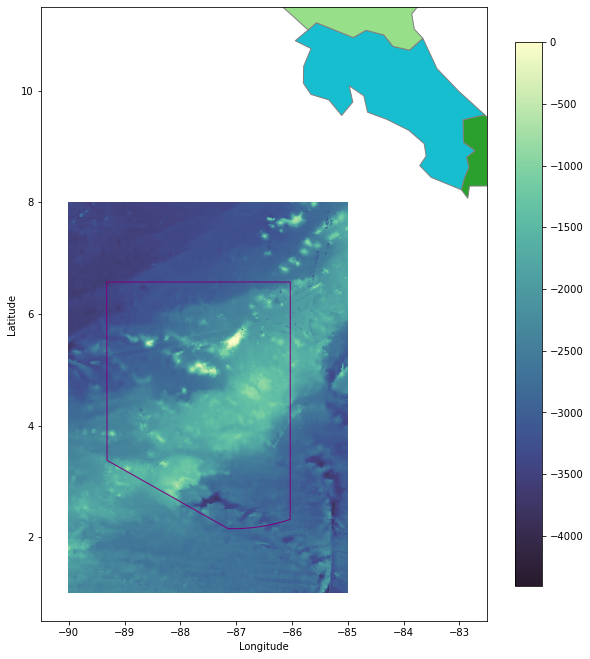

In [11]:
fig, ax = plt.subplots(figsize=(10,20))

# Crop the positive elevation (I think for Cocos!) with vmax = 0
pcol = ax.pcolor(Lon, Lat, z, cmap = cmocean.cm.deep_r, vmax = 0);

cbar = fig.colorbar(pcol, ax=ax, shrink=0.5)
# We only plot countries in N. America with a larger population, for colormaps.
world[(world.continent=='North America')&(world.gdp_md_est > 10000)].sort_values(by="name").plot(
    ax=ax, 
    edgecolor='gray', cmap='tab20_r')

AMMB.plot(ax=ax, alpha = 1, edgecolor='purple', facecolor="none")

ax.set_xlim((-90.5, -82.5))
ax.set_ylim((0.5, 11.5))

ax.set_xlabel("Longitude");
ax.set_ylabel("Latitude");
ax.set_aspect('equal')